### **Customer Segmentation-Factor Analysis and Cluster Analysis**

In this initial phase of the Athena project, we commence by setting up our analytical environment, which involves installing and importing the essential libraries required for our comprehensive data analysis. This foundational step is critical as we aim to craft a robust acquisition strategy, offering Athena's executives actionable insights and data-driven recommendations. The ultimate objective is to identify the most promising product for acquisition, ensuring alignment with Athena's strategic goals and maximizing return on investment.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 380.3 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 15.2 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=d42383ef1a6c67bef358b4c1a7e2f09a883e174514c599ec1ab903be511aa098
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


Creating a data frame with the customer data

In [ ]:
data = pd.read_csv('Athena_survey_data.csv')
data
data.iloc[:,4:44]

,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,imp.mastery,imp.backstory,imp.dominate,imp.completion,...,enj.guns,enj.gore,enj.blow.up,freq.explore,freq.experiment,freq.study,freq.char.creation,freq.stats,freq.customize,freq.test.world
0,5,6,7,4,6,5,4,5,5,4,...,3,3,3,5,6,3,6,7,4,7
1,4,2,5,3,4,6,5,6,4,1,...,3,5,3,5,7,5,6,3,6,6
2,7,5,2,5,3,4,6,2,6,5,...,2,4,2,1,4,5,1,4,2,5
3,4,3,4,6,1,2,3,2,6,4,...,1,1,2,2,3,4,3,2,5,2
4,6,4,3,6,3,2,6,2,2,2,...,2,3,2,4,5,6,3,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4,3,6,4,4,6,3,5,7,2,...,5,2,3,6,2,4,5,2,5,3
823,6,7,7,6,6,6,4,7,4,6,...,1,2,2,3,5,5,4,5,4,5
824,4,4,3,3,6,7,3,7,6,4,...,3,3,4,5,7,3,4,4,4,5
825,5,6,3,4,4,5,3,3,1,6,...,2,3,2,5,6,4,3,7,4,6


In [ ]:
non_var = ['gender', 'state', 'age', 'income','gg.game.presented', 'gg.maxprice','rank.WarriorGuild',
       'rank.SeraphGuardians', 'rank.Evercrest', 'rank.DevilsGate',
       'rank.Marksman', 'rank.QuestoftheTitan']
vars = [col for col in data.columns if col not in non_var]
factor_vars = data[vars]
factor_vars

,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,imp.mastery,imp.backstory,imp.dominate,imp.completion,...,enj.guns,enj.gore,enj.blow.up,freq.explore,freq.experiment,freq.study,freq.char.creation,freq.stats,freq.customize,freq.test.world
0,5,6,7,4,6,5,4,5,5,4,...,3,3,3,5,6,3,6,7,4,7
1,4,2,5,3,4,6,5,6,4,1,...,3,5,3,5,7,5,6,3,6,6
2,7,5,2,5,3,4,6,2,6,5,...,2,4,2,1,4,5,1,4,2,5
3,4,3,4,6,1,2,3,2,6,4,...,1,1,2,2,3,4,3,2,5,2
4,6,4,3,6,3,2,6,2,2,2,...,2,3,2,4,5,6,3,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4,3,6,4,4,6,3,5,7,2,...,5,2,3,6,2,4,5,2,5,3
823,6,7,7,6,6,6,4,7,4,6,...,1,2,2,3,5,5,4,5,4,5
824,4,4,3,3,6,7,3,7,6,4,...,3,3,4,5,7,3,4,4,4,5
825,5,6,3,4,4,5,3,3,1,6,...,2,3,2,5,6,4,3,7,4,6


Testing if data variables are correlated and if it is suitable for clustering and factor analysis

In [ ]:
# Step 1: Evaluate the data
# Bartlett's Test of Sphericity (we want p < 0.05 to go ahead)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(factor_vars)
print(f"Bartlett's Test of Sphericity p-value: {p_value}")

# KMO-test (we want overall MSA > 0.6 to go ahead)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(factor_vars)
print(f"KMO-test overall MSA: {kmo_model}")

Bartlett's Test of Sphericity p-value: 0.0
KMO-test overall MSA: 0.8701380128313353


[0.17470604 0.29677417 0.40554752 0.46676438 0.52266478 0.57242028
 0.60847143 0.64336874 0.67616485 0.70757148 0.73593055 0.76071626
 0.77308013 0.78502103 0.79621268 0.80722548 0.81807951 0.82844269
 0.83845975 0.8482223  0.85775342 0.86718259 0.87624193 0.88527351
 0.89407428 0.90269146 0.91098349 0.9190122  0.9270005  0.9347899
 0.9423286  0.9496231  0.95681721 0.96376735 0.97059468 0.97713363
 0.98332756 0.98918687 0.99462975 1.        ]


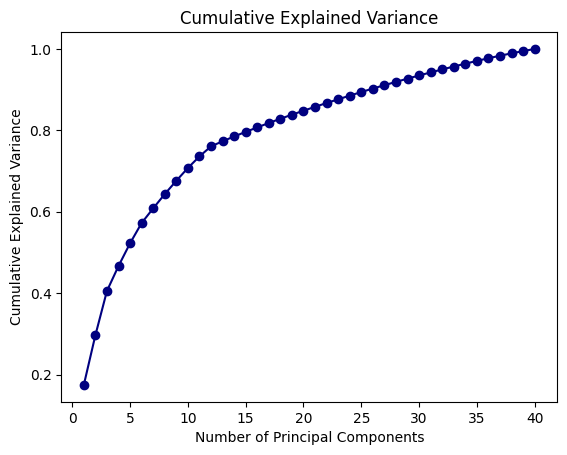

[6.99670203 4.88863646 4.35620131 2.45163899 2.23872323 1.99262917
 1.44379198 1.39758246 1.31343252 1.25778586 1.13573613 0.99262882
 0.49515349 0.47821435 0.44820805 0.44104524 0.43468685 0.41502891
 0.40116737 0.3909749  0.38170652 0.37762322 0.36281221 0.36170064
 0.35245708 0.34510457 0.33208262 0.32153735 0.31991887 0.31195317
 0.30191319 0.29213323 0.28811272 0.27834207 0.27342393 0.26187468
 0.24805693 0.23465604 0.21797911 0.21506989]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import Rotator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 2: Determine the number of factors

# Standardize the features (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(factor_vars)

# Create and fit the PCA model to determine the number of components
pca = PCA()
pca.fit(data_scaled)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratios.cumsum()
print(cumulative_explained_variance)
# Plot the explained variance ratios, want the factors to explain
# very roughly 70% or more of the variance
plt.plot(range(1, len(explained_variance_ratios) + 1),
         cumulative_explained_variance, marker='o',color='navy')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Eigenvalues; typically want values > 1, but here we are choosing 5 based on the plot
print(pca.explained_variance_)

Here I am assigning factor interpretation names to each factor

In [ ]:
# Perform factor analysis with 5 factors
from factor_analyzer import Rotator
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=11)
fa.fit(data_scaled)

# Rotate the factor loadings matrix for better interpretability
rotator = Rotator(method='varimax')
rotated_loading = rotator.fit_transform(fa.components_.T)

# Display the rotated factor loadings
print("Rotated Factor Loadings:")
factor_loading_df = pd.DataFrame(rotated_loading,
                                 columns=[f'Factor {i+1}' for i in range(11)],
                                 index=data.columns[4:44])
print(factor_loading_df)
factor_names = [
    "Fantasy&Immersion",  # Factor 1
    "Non-competitive Gameplay",   # Factor 2
    "Strategic Play",         # Factor 3
    "Action&Excitement",  # Factor 4
    "Non-Exploratory Play",    # Factor 5
    "Slow&Steady Play",     # Factor 6
    "Achievement&Completion", # Factor 7
    "Anti-Narrative", # Factor 8
    "Customization&Creation",  # Factor 9
    "Personalization", # Factor 10
    "Anti-Challenge",  # Factor 11
]
factor_loading_df.columns = factor_names
factor_loading_df

Rotated Factor Loadings:
                    Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
imp.challenge      -0.057065 -0.033970  0.277654 -0.126395 -0.164962   
imp.unlocks         0.031774  0.130731 -0.088051 -0.114744  0.011919   
imp.customize       0.198579 -0.064563  0.039728 -0.135150 -0.115172   
imp.difficulty     -0.017642 -0.026763  0.252903 -0.141871 -0.147962   
imp.characters      0.268131  0.093544  0.027395  0.000720 -0.087754   
imp.storyline       0.287449  0.061964  0.034096 -0.018182 -0.092673   
imp.mastery        -0.027527 -0.003725  0.571013 -0.111419 -0.109771   
imp.backstory       0.271239  0.051746  0.000184 -0.004459 -0.098729   
imp.dominate       -0.018153 -0.728811  0.030938  0.002703 -0.052375   
imp.completion      0.015298  0.161185 -0.055275 -0.123350  0.040430   
imp.wealth          0.181694  0.048875  0.037137 -0.060497 -0.132980   
imp.fantasy         0.764385  0.044256  0.053400 -0.115899 -0.125438   
imp.items           0.683093  0.047930 

,Fantasy&Immersion,Non-competitive Gameplay,Strategic Play,Action&Excitement,Non-Exploratory Play,Slow&Steady Play,Achievement&Completion,Anti-Narrative,Customization&Creation,Personalization,Anti-Challenge
imp.challenge,-0.057065,-0.033970,0.277654,-0.126395,-0.164962,0.029388,0.010756,0.094770,-0.029088,-0.027711,-0.731341
imp.unlocks,0.031774,0.130731,-0.088051,-0.114744,0.011919,0.089988,0.801934,0.057604,0.000776,-0.180000,-0.010613
imp.customize,0.198579,-0.064563,0.039728,-0.135150,-0.115172,-0.016081,-0.006651,-0.107246,0.772460,0.009363,0.008098
imp.difficulty,-0.017642,-0.026763,0.252903,-0.141871,-0.147962,0.045795,0.019854,0.086736,0.025699,-0.076325,-0.698530
imp.characters,0.268131,0.093544,0.027395,0.000720,-0.087754,0.023504,-0.035877,-0.798239,0.060898,-0.007502,0.051146
imp.storyline,0.287449,0.061964,0.034096,-0.018182,-0.092673,-0.009830,-0.069905,-0.776210,0.131754,-0.037346,0.070889
imp.mastery,-0.027527,-0.003725,0.571013,-0.111419,-0.109771,0.041716,-0.088947,0.004515,0.006972,0.035232,-0.460059
imp.backstory,0.271239,0.051746,0.000184,-0.004459,-0.098729,0.049025,-0.022901,-0.802362,0.104061,-0.032856,0.067448
imp.dominate,-0.018153,-0.728811,0.030938,0.002703,-0.052375,-0.157530,-0.107301,0.050590,0.069837,0.121481,-0.025730
imp.completion,0.015298,0.161185,-0.055275,-0.123350,0.040430,0.106480,0.760372,0.047343,-0.026347,-0.201611,0.012979


In [ ]:
factor_scores = fa.transform(data_scaled)

In [ ]:
data["Fantasy&Immersion"] = factor_scores[:, 0]
data["Non-competitive Gameplay"] = factor_scores[:, 1]
data["Strategic Play"] = factor_scores[:, 2]
data["Action&Excitement"] = factor_scores[:, 3]
data["Non-Exploratory Play"] = factor_scores[:, 4]
data["Slow&Steady Play"] = factor_scores[:, 5]
data["Achievement&Completion"] = factor_scores[:, 6]
data["Anti-Narrative"] = factor_scores[:, 7]
data["Customization&Creation"] = factor_scores[:, 8]
data["Cooperative Social Play"] = factor_scores[:, 9]
data["Anti-Challenge"] = factor_scores[:, 10]


<ipython-input-10-b195e02d82e6>:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hc = linkage(dissimilarity_matrix, method="ward")


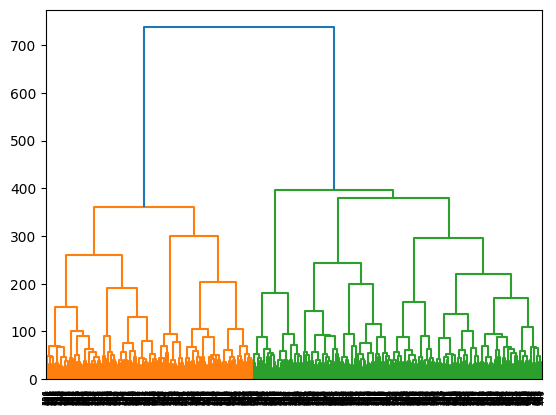

In [ ]:
# Step 1: determine the number of clusters
# Option A: dendogram
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
dissimilarity_matrix = squareform(pdist(data_scaled, metric='euclidean'))

# perform hierarchical clustering using Ward's method on this matrix
hc = linkage(dissimilarity_matrix, method="ward")

# plot the resulting dendrogram
dendrogram(hc, leaf_font_size=6)
plt.show()

Using the elbow plot to find the optimal number of clusters for K-Means cluster analysis

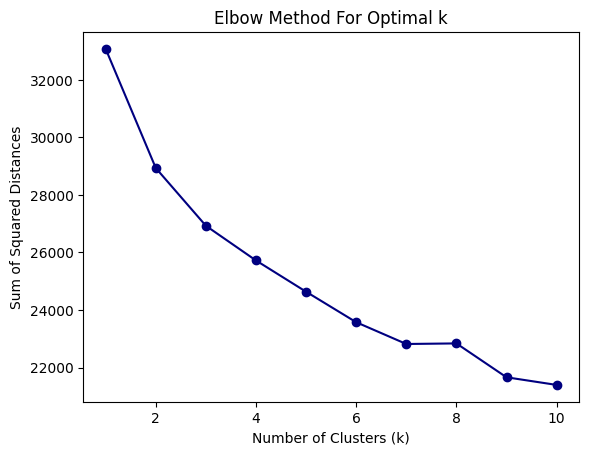

In [ ]:
# Option B: The Elbow
from sklearn.cluster import KMeans

# Calculate the sum of squared distances for different values of k
sum_of_squared_distances = []
K_range = range(1, 11)  # You can adjust this range based on your problem
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, sum_of_squared_distances, marker='o',color='navy')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

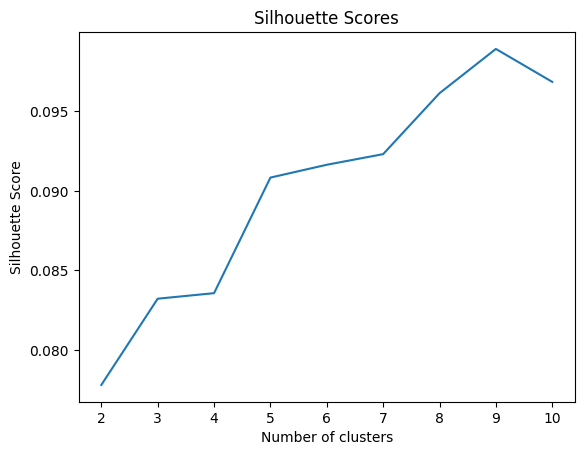

In [ ]:
# Also consider the silhouette score
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(factor_scores)
    score = silhouette_score(factor_scores, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
# Calculate the 8-cluster solution
kmeans8 = KMeans(n_clusters=8, random_state=13, n_init='auto')

# Add a new column with cluster assignment for each person
data8 = data.copy()
data8['Cluster8'] = kmeans8.fit_predict(data8.iloc[:, 52:])
data8.iloc[:,52:63]

,Fantasy&Immersion,Non-competitive Gameplay,Strategic Play,Action&Excitement,Non-Exploratory Play,Slow&Steady Play,Achievement&Completion,Anti-Narrative,Customization&Creation,Cooperative Social Play,Anti-Challenge
0,1.160885,-0.533530,-0.056870,-1.279314,-0.966721,0.443075,0.482967,-0.899352,0.894280,-0.486405,0.236491
1,0.838951,-1.354620,-0.241895,-0.036203,0.015988,0.450966,-1.338000,0.165370,1.208355,-1.105522,1.135556
2,-0.637219,-0.011850,1.167330,-0.641119,-0.133101,0.130074,0.791712,0.814950,-1.159156,-1.156533,-0.478209
3,-0.732580,-0.052906,1.135487,-2.155789,0.384645,-1.398636,-0.867871,-0.119298,-1.245556,-0.342732,-0.063287
4,-0.176456,-0.424006,1.988822,-0.290497,-0.098808,1.379733,-0.218033,0.763579,0.942529,-0.188121,-0.288558
...,...,...,...,...,...,...,...,...,...,...,...
822,0.157934,-1.528245,-0.647683,-1.210894,0.268080,-1.043730,0.693259,-0.262542,-0.031430,-0.334014,0.031200
823,1.290947,0.627132,0.366465,-0.774977,0.275813,0.278681,0.941048,-1.055430,0.130985,-1.618163,-0.260353
824,1.180686,-1.336635,-0.802091,-0.883294,-0.224574,1.581370,1.581162,0.579768,-0.271671,-0.707659,1.269715
825,0.173202,1.310277,0.788660,-0.579015,-0.862934,0.782748,-1.222345,-0.992630,0.225553,0.390037,-0.200579


In [ ]:
print("Cluster Centers:")
pd.DataFrame(kmeans8.cluster_centers_, columns= data8.columns[52:63],
            index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7'],)

Cluster Centers:


,Fantasy&Immersion,Non-competitive Gameplay,Strategic Play,Action&Excitement,Non-Exploratory Play,Slow&Steady Play,Achievement&Completion,Anti-Narrative,Customization&Creation,Cooperative Social Play,Anti-Challenge
Cluster 0,-0.407865,0.478601,1.339794,0.147679,-0.584136,0.718172,-0.150539,-0.096912,0.201872,-0.336897,-0.008025
Cluster 1,1.004978,0.273596,-0.384506,0.019711,-0.702373,-0.636158,-0.484361,-0.089024,0.101924,-0.012660,0.041670
Cluster 2,0.342553,-0.605738,-0.732788,-0.412214,0.619175,0.986033,-0.245264,0.427106,0.441205,0.017628,0.077930
Cluster 3,0.883716,-0.922286,0.278446,0.095306,-0.012060,0.031627,0.732588,-0.530253,0.057576,-0.075485,-0.132498
Cluster 4,-0.824740,0.177033,-0.906266,1.452666,0.182123,-0.051516,0.044568,-0.019640,0.013486,0.029671,-0.083528
Cluster 5,-1.134627,-0.500669,-0.527956,-0.763028,-0.550792,-0.192337,0.313479,-0.136536,-0.147541,-0.078714,0.130674
Cluster 6,-0.361487,-0.531754,0.950056,0.085721,0.603488,-0.533013,-0.441504,0.320267,-0.295006,0.321940,-0.120299
Cluster 7,0.198211,1.311001,-0.001289,-0.412988,0.392734,0.003946,0.313482,0.072510,-0.248954,0.046289,0.072946


In [ ]:
# Calculate the 8-cluster solution
kmeans5 = KMeans(n_clusters=5, random_state=13, n_init='auto')

# Add a new column with cluster assignment for each person
data5 = data.copy()
data5['Cluster5'] = kmeans5.fit_predict(data5.iloc[:, 52:])
data5.iloc[:,52:63]

,Fantasy&Immersion,Non-competitive Gameplay,Strategic Play,Action&Excitement,Non-Exploratory Play,Slow&Steady Play,Achievement&Completion,Anti-Narrative,Customization&Creation,Cooperative Social Play,Anti-Challenge
0,1.160885,-0.533530,-0.056870,-1.279314,-0.966721,0.443075,0.482967,-0.899352,0.894280,-0.486405,0.236491
1,0.838951,-1.354620,-0.241895,-0.036203,0.015988,0.450966,-1.338000,0.165370,1.208355,-1.105522,1.135556
2,-0.637219,-0.011850,1.167330,-0.641119,-0.133101,0.130074,0.791712,0.814950,-1.159156,-1.156533,-0.478209
3,-0.732580,-0.052906,1.135487,-2.155789,0.384645,-1.398636,-0.867871,-0.119298,-1.245556,-0.342732,-0.063287
4,-0.176456,-0.424006,1.988822,-0.290497,-0.098808,1.379733,-0.218033,0.763579,0.942529,-0.188121,-0.288558
...,...,...,...,...,...,...,...,...,...,...,...
822,0.157934,-1.528245,-0.647683,-1.210894,0.268080,-1.043730,0.693259,-0.262542,-0.031430,-0.334014,0.031200
823,1.290947,0.627132,0.366465,-0.774977,0.275813,0.278681,0.941048,-1.055430,0.130985,-1.618163,-0.260353
824,1.180686,-1.336635,-0.802091,-0.883294,-0.224574,1.581370,1.581162,0.579768,-0.271671,-0.707659,1.269715
825,0.173202,1.310277,0.788660,-0.579015,-0.862934,0.782748,-1.222345,-0.992630,0.225553,0.390037,-0.200579


In [ ]:
print("Cluster Centers:")
pd.DataFrame(kmeans5.cluster_centers_, columns= data5.columns[52:63],
            index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],)

Cluster Centers:


,Fantasy&Immersion,Non-competitive Gameplay,Strategic Play,Action&Excitement,Non-Exploratory Play,Slow&Steady Play,Achievement&Completion,Anti-Narrative,Customization&Creation,Cooperative Social Play,Anti-Challenge
Cluster 0,1.019011,-0.416166,-0.043002,-0.023249,-0.492658,-0.425206,-0.055687,-0.195736,0.087580,-0.103411,-0.036129
Cluster 1,-0.423958,-0.268972,1.197286,0.086313,0.140035,0.012244,-0.346899,0.249980,-0.125165,0.154334,0.000232
Cluster 2,-0.874693,-0.004126,-0.727090,0.944457,-0.097446,-0.247778,0.176016,-0.077738,-0.149503,-0.015516,-0.038369
Cluster 3,-0.132188,-0.624227,-0.825438,-0.612940,0.310633,0.804760,-0.047184,0.174131,0.363641,-0.020312,0.027329
Cluster 4,0.170979,1.216265,0.084878,-0.404929,0.242319,0.048068,0.300601,-0.107952,-0.119257,-0.015349,0.051452


In [ ]:
data5['Segment_Label'] = data5['Cluster5'].replace({0: "Immersive Adventurers", 1: "Strategic Competitors", 2: "Dynamic Action Seekers", 3: "Relaxed Enthusiasts", 4: "Community Engagers"})
data5

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,ageNew,stateNew,incomeNew,Cluster_Cat,Segment_Community Engagers,Segment_Dynamic Action Seekers,Segment_Immersive Adventurers,Segment_Relaxed Enthusiasts,Segment_Strategic Competitors,Segment_Label
0,female,AZ,24,54000,5,6,7,4,6,5,...,18–25,West,"$40,000 to $59,999",Immersive Adventurers,0,0,1,0,0,Immersive Adventurers
1,male,FL,18,12000,4,2,5,3,4,6,...,18–25,South,"Under $20,000",Relaxed Enthusiasts,0,0,0,1,0,Relaxed Enthusiasts
2,male,IL,23,41000,7,5,2,5,3,4,...,18–25,Midwest,"$40,000 to $59,999",Strategic Competitors,0,0,0,0,1,Strategic Competitors
3,male,CA,21,61000,4,3,4,6,1,2,...,18–25,West,"$60,000 to $79,999",Strategic Competitors,0,0,0,0,1,Strategic Competitors
4,male,FL,25,59000,6,4,3,6,3,2,...,26–35,South,"$40,000 to $59,999",Strategic Competitors,0,0,0,0,1,Strategic Competitors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,female,LA,22,22000,4,3,6,4,4,6,...,18–25,South,"$20,000 to $39,999",Immersive Adventurers,0,0,1,0,0,Immersive Adventurers
823,female,CA,24,34000,6,7,7,6,6,6,...,18–25,West,"$20,000 to $39,999",Community Engagers,1,0,0,0,0,Community Engagers
824,female,LA,20,25000,4,4,3,3,6,7,...,18–25,South,"$20,000 to $39,999",Relaxed Enthusiasts,0,0,0,1,0,Relaxed Enthusiasts
825,male,IL,25,56000,5,6,3,4,4,5,...,26–35,Midwest,"$40,000 to $59,999",Community Engagers,1,0,0,0,0,Community Engagers


### **Cross Tab Analysis**

In [ ]:
from scipy.stats import chi2_contingency
def xtab(d1, d2):
    crosstab = pd.crosstab(index=d1, columns=d2)
    chi2, p, _, expected = chi2_contingency(crosstab)
    contributions = (crosstab - expected) ** 2 / expected

    # Create a multi-index DataFrame
    index = pd.MultiIndex.from_product([crosstab.index, ['Observed', 'Expected', 'Chi squared']])
    columns = pd.MultiIndex.from_product([crosstab.columns])

    df = pd.DataFrame(index=index, columns=columns)

    # Fill in the DataFrame
    df.loc[crosstab.index, 'Observed', :] = crosstab.values
    df.loc[crosstab.index, 'Expected', :] = expected.round(2)
    df.loc[crosstab.index, 'Chi squared', :] = contributions.values.round(2)

    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p}")
    return(df)

In [ ]:
pd.crosstab(data5['gender'],data5['Segment_Label'])

Segment_Label,Community Engagers,Dynamic Action Seekers,Immersive Adventurers,Relaxed Enthusiasts,Strategic Competitors
gender,,,,,
female,73,65,97,71,71
male,99,82,91,63,102
nonbinary,2,3,3,0,5


In [ ]:
xtab(data5['gender'],data5['Segment_Label'])

Chi-squared value: 12.03594195644825
P-value: 0.1496074314820157


Segment_Label         Community Engagers Dynamic Action Seekers  \
gender                                                            
female    Observed                    73                     65   
          Expected                 79.32                  68.38   
          Chi squared                0.5                   0.17   
male      Observed                    99                     82   
          Expected                 91.94                  79.26   
          Chi squared               0.54                   0.09   
nonbinary Observed                     2                      3   
          Expected                  2.74                   2.36   
          Chi squared                0.2                   0.17   

Segment_Label         Immersive Adventurers Relaxed Enthusiasts  \
gender                                                            
female    Observed                       97                  71   
          Expected                    87.07               61.09   
          Chi squared                  1.13                1.61   
male      Observed                       91                  63   
          Expected                   100.93               70.81   
          Chi squared                  0.98                0.86   
nonbinary Observed                        3                   0   
          Expected                      3.0                2.11   
          Chi squared                   0.0                2.11   

Segment_Label         Strategic Competitors  
gender                                       
female    Observed                       71  
          Expected                    81.14  
          Chi squared                  1.27  
male      Observed                      102  
          Expected                    94.06  
          Chi squared                  0.67  
nonbinary Observed                        5  
          Expected                      2.8  
          Chi squared                  1.73

In [ ]:
# Define the edges of the age bins
age_bins = [18, 25, 35, 45, 55, 65, float('inf')]  # float('inf') is used for ages above 65

# Define the labels for the age groups
age_labels = ['18–25', '26–35', '36–45', '46-55', '56-65', '65 and above']

# Create the new age group column
data5['ageNew'] = pd.cut(data5['age'], bins=age_bins, labels=age_labels, right=False)


In [ ]:
pd.crosstab(data5['ageNew'],data5['Segment_Label'])

Segment_Label,Community Engagers,Dynamic Action Seekers,Immersive Adventurers,Relaxed Enthusiasts,Strategic Competitors
ageNew,,,,,
18–25,48,79,95,82,104
26–35,68,43,63,48,61
36–45,23,21,20,4,6
46-55,12,4,8,0,5
56-65,22,3,5,0,2
65 and above,1,0,0,0,0


In [ ]:
xtab(data5['ageNew'],data5['Segment_Label'])

Chi-squared value: 106.75709784006334
P-value: 7.635555188373134e-14


Segment_Label            Community Engagers Dynamic Action Seekers  \
ageNew                                                               
18–25        Observed                    48                     79   
             Expected                 85.84                   74.0   
             Chi squared              16.68                   0.34   
26–35        Observed                    68                     43   
             Expected                 59.54                  51.33   
             Chi squared                1.2                   1.35   
36–45        Observed                    23                     21   
             Expected                 15.57                  13.42   
             Chi squared               3.55                   4.28   
46-55        Observed                    12                      4   
             Expected                   6.1                   5.26   
             Chi squared                5.7                    0.3   
56-65        Observed                    22                      3   
             Expected                  6.73                    5.8   
             Chi squared              34.62                   1.35   
65 and above Observed                     1                      0   
             Expected                  0.21                   0.18   
             Chi squared               2.96                   0.18   

Segment_Label            Immersive Adventurers Relaxed Enthusiasts  \
ageNew                                                               
18–25        Observed                       95                  82   
             Expected                    94.23               66.11   
             Chi squared                  0.01                3.82   
26–35        Observed                       63                  48   
             Expected                    65.36               45.85   
             Chi squared                  0.09                 0.1   
36–45        Observed                       20                   4   
             Expected                    17.09               11.99   
             Chi squared                   0.5                5.32   
46-55        Observed                        8                   0   
             Expected                      6.7                 4.7   
             Chi squared                  0.25                 4.7   
56-65        Observed                        5                   0   
             Expected                     7.39                5.19   
             Chi squared                  0.77                5.19   
65 and above Observed                        0                   0   
             Expected                     0.23                0.16   
             Chi squared                  0.23                0.16   

Segment_Label            Strategic Competitors  
ageNew                                          
18–25        Observed                      104  
             Expected                    87.82  
             Chi squared                  2.98  
26–35        Observed                       61  
             Expected                    60.91  
             Chi squared                   0.0  
36–45        Observed                        6  
             Expected                    15.93  
             Chi squared                  6.19  
46-55        Observed                        5  
             Expected                     6.24  
             Chi squared                  0.25  
56-65        Observed                        2  
             Expected                     6.89  
             Chi squared                  3.47  
65 and above Observed                        0  
             Expected                     0.22  
             Chi squared                  0.22

In [ ]:
data5

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,Cluster5,ageNew,stateNew,incomeNew,Cluster_Cat,Segment_Community Engagers,Segment_Dynamic Action Seekers,Segment_Immersive Adventurers,Segment_Relaxed Enthusiasts,Segment_Strategic Competitors
0,female,AZ,24,54000,5,6,7,4,6,5,...,0,18–25,West,"$40,000 to $59,999",Immersive Adventurers,0,0,1,0,0
1,male,FL,18,12000,4,2,5,3,4,6,...,3,18–25,South,"Under $20,000",Relaxed Enthusiasts,0,0,0,1,0
2,male,IL,23,41000,7,5,2,5,3,4,...,1,18–25,Midwest,"$40,000 to $59,999",Strategic Competitors,0,0,0,0,1
3,male,CA,21,61000,4,3,4,6,1,2,...,1,18–25,West,"$60,000 to $79,999",Strategic Competitors,0,0,0,0,1
4,male,FL,25,59000,6,4,3,6,3,2,...,1,26–35,South,"$40,000 to $59,999",Strategic Competitors,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,female,LA,22,22000,4,3,6,4,4,6,...,0,18–25,South,"$20,000 to $39,999",Immersive Adventurers,0,0,1,0,0
823,female,CA,24,34000,6,7,7,6,6,6,...,4,18–25,West,"$20,000 to $39,999",Community Engagers,1,0,0,0,0
824,female,LA,20,25000,4,4,3,3,6,7,...,3,18–25,South,"$20,000 to $39,999",Relaxed Enthusiasts,0,0,0,1,0
825,male,IL,25,56000,5,6,3,4,4,5,...,4,26–35,Midwest,"$40,000 to $59,999",Community Engagers,1,0,0,0,0


In [ ]:
import statsmodels.api as sm

X = data5[['Segment_Community Engagers','Segment_Dynamic Action Seekers','Segment_Immersive Adventurers','Segment_Relaxed Enthusiasts','Segment_Strategic Competitors']]
y = data5['age']

# Add a constant term to the feature matrix (if not already added)
X = sm.add_constant(X)

# Create and fit the linear regression model
model_age = sm.OLS(y, X).fit()

# Get the cluster model summary
print(model_age.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     28.97
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           1.50e-22
Time:                        19:06:00   Log-Likelihood:                -2993.1
No. Observations:                 827   AIC:                             5996.
Df Residuals:                     822   BIC:                             6020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# Define the mapping of states to regions
state_to_region = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast',
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast', 'NJ': 'Northeast',
    'WI': 'Midwest', 'MI': 'Midwest', 'IL': 'Midwest', 'IN': 'Midwest',
    'OH': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest',
    'DE': 'South', 'MD': 'South', 'VA': 'South', 'WV': 'South', 'KY': 'South',
    'NC': 'South', 'SC': 'South', 'TN': 'South', 'GA': 'South', 'AL': 'South',
    'MS': 'South', 'AR': 'South', 'LA': 'South', 'FL': 'South', 'TX': 'South', 'OK': 'South',
    'MT': 'West', 'ID': 'West', 'WY': 'West', 'CO': 'West', 'NM': 'West',
    'AZ': 'West', 'UT': 'West', 'NV': 'West', 'CA': 'West', 'OR': 'West', 'WA': 'West',
    'AK': 'West', 'HI': 'West'
}

# Apply the mapping to create a new column
data5['stateNew'] = data5['state'].map(state_to_region)


In [ ]:
pd.crosstab(data5['stateNew'],data5['Segment_Label'])

Segment_Label,Community Engagers,Dynamic Action Seekers,Immersive Adventurers,Relaxed Enthusiasts,Strategic Competitors
stateNew,,,,,
Midwest,35,24,37,24,35
Northeast,27,25,31,30,35
South,75,66,65,45,68
West,37,35,58,35,40


In [ ]:
xtab(data5['stateNew'],data5['Segment_Label'])

Chi-squared value: 11.584092636923902
P-value: 0.479632508354895


Segment_Label         Community Engagers Dynamic Action Seekers  \
stateNew                                                          
Midwest   Observed                    35                     24   
          Expected                 32.61                  28.11   
          Chi squared               0.17                    0.6   
Northeast Observed                    27                     25   
          Expected                 31.14                  26.84   
          Chi squared               0.55                   0.13   
South     Observed                    75                     66   
          Expected                 67.12                  57.86   
          Chi squared               0.93                   1.15   
West      Observed                    37                     35   
          Expected                 43.13                  37.18   
          Chi squared               0.87                   0.13   

Segment_Label         Immersive Adventurers Relaxed Enthusiasts  \
stateNew                                                          
Midwest   Observed                       37                  24   
          Expected                     35.8               25.11   
          Chi squared                  0.04                0.05   
Northeast Observed                       31                  30   
          Expected                    34.18               23.98   
          Chi squared                   0.3                1.51   
South     Observed                       65                  45   
          Expected                    73.67               51.69   
          Chi squared                  1.02                0.87   
West      Observed                       58                  35   
          Expected                    47.35               33.22   
          Chi squared                   2.4                 0.1   

Segment_Label         Strategic Competitors  
stateNew                                     
Midwest   Observed                       35  
          Expected                    33.36  
          Chi squared                  0.08  
Northeast Observed                       35  
          Expected                    31.85  
          Chi squared                  0.31  
South     Observed                       68  
          Expected                    68.66  
          Chi squared                  0.01  
West      Observed                       40  
          Expected                    44.12  
          Chi squared                  0.39

In [ ]:
# Define the edges of the income bins
income_bins = [0, 19999, 39999, 59999, 79999, 99999, 119999, 149999, float('inf')]

# Define the labels for the income groups
income_labels = ['Under $20,000', '$20,000 to $39,999', '$40,000 to $59,999',
                 '$60,000 to $79,999', '$80,000 to $99,999', '$100,000 to $119,999',
                 '$120,000 to $149,999', '$150,000 and above']

# Create the new income group column
data5['incomeNew'] = pd.cut(data5['income'], bins=income_bins, labels=income_labels, right=False)

In [ ]:
pd.crosstab(data5['incomeNew'],data5['Segment_Label'])

Segment_Label,Community Engagers,Dynamic Action Seekers,Immersive Adventurers,Relaxed Enthusiasts,Strategic Competitors
incomeNew,,,,,
"Under $20,000",10,24,35,26,30
"$20,000 to $39,999",41,48,47,47,57
"$40,000 to $59,999",35,28,42,33,46
"$60,000 to $79,999",37,21,27,18,20
"$80,000 to $99,999",25,16,16,7,10
"$100,000 to $119,999",11,7,14,1,10
"$120,000 to $149,999",9,5,8,1,5
"$150,000 and above",6,1,2,1,0


In [ ]:
xtab(data5['incomeNew'],data5['Segment_Label'])

Chi-squared value: 61.38537727487949
P-value: 0.00027016371696675346


Segment_Label                    Community Engagers Dynamic Action Seekers  \
incomeNew                                                                    
Under $20,000        Observed                    10                     24   
                     Expected                  26.3                  22.67   
                     Chi squared               10.1                   0.08   
$20,000 to $39,999   Observed                    41                     48   
                     Expected                  50.5                  43.53   
                     Chi squared               1.79                   0.46   
$40,000 to $59,999   Observed                    35                     28   
                     Expected                 38.71                  33.37   
                     Chi squared               0.36                   0.87   
$60,000 to $79,999   Observed                    37                     21   
                     Expected                 25.88                  22.31   
                     Chi squared               4.78                   0.08   
$80,000 to $99,999   Observed                    25                     16   
                     Expected                 15.57                  13.42   
                     Chi squared               5.71                    0.5   
$100,000 to $119,999 Observed                    11                      7   
                     Expected                  9.05                    7.8   
                     Chi squared               0.42                   0.08   
$120,000 to $149,999 Observed                     9                      5   
                     Expected                  5.89                   5.08   
                     Chi squared               1.64                    0.0   
$150,000 and above   Observed                     6                      1   
                     Expected                   2.1                   1.81   
                     Chi squared               7.21                   0.37   

Segment_Label                    Immersive Adventurers Relaxed Enthusiasts  \
incomeNew                                                                    
Under $20,000        Observed                       35                  26   
                     Expected                    28.87               20.25   
                     Chi squared                   1.3                1.63   
$20,000 to $39,999   Observed                       47                  47   
                     Expected                    55.43               38.89   
                     Chi squared                  1.28                1.69   
$40,000 to $59,999   Observed                       42                  33   
                     Expected                     42.5               29.81   
                     Chi squared                  0.01                0.34   
$60,000 to $79,999   Observed                       27                  18   
                     Expected                    28.41               19.93   
                     Chi squared                  0.07                0.19   
$80,000 to $99,999   Observed                       16                   7   
                     Expected                    17.09               11.99   
                     Chi squared                  0.07                2.08   
$100,000 to $119,999 Observed                       14                   1   
                     Expected                     9.93                6.97   
                     Chi squared                  1.67                5.11   
$120,000 to $149,999 Observed                        8                   1   
                     Expected                     6.47                4.54   
                     Chi squared                  0.36                2.76   
$150,000 and above   Observed                        2                   1   
                     Expected                     2.31                1.62   
                     

In [ ]:
import statsmodels.api as sm

data5['Cluster_Cat'] = data5['Segment_Label'].astype('category')

# Prepare the data for regression
X = pd.get_dummies(data5['Cluster_Cat'], drop_first=True)  # One-Hot Encoding for categorical data
y = data5['age']

# Add a constant to the model
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# View the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     28.97
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           1.50e-22
Time:                        18:09:47   Log-Likelihood:                -2993.1
No. Observations:                 827   AIC:                             5996.
Df Residuals:                     822   BIC:                             6020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     33

In [ ]:
import statsmodels.api as sm

data5['Cluster_Cat'] = data5['Segment_Label'].astype('category')

# Prepare the data for regression
X = pd.get_dummies(data5['Cluster_Cat'], drop_first=True)  # One-Hot Encoding for categorical data
y = data5['income']

# Add a constant to the model
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# View the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     11.56
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           3.92e-09
Time:                        18:09:47   Log-Likelihood:                -9773.1
No. Observations:                 827   AIC:                         1.956e+04
Df Residuals:                     822   BIC:                         1.958e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   6.48

In [ ]:
data5.columns

Index(['gender', 'state', 'age', 'income', 'imp.challenge', 'imp.unlocks',
       'imp.customize', 'imp.difficulty', 'imp.characters', 'imp.storyline',
       'imp.mastery', 'imp.backstory', 'imp.dominate', 'imp.completion',
       'imp.wealth', 'imp.fantasy', 'imp.items', 'imp.power', 'imp.offbeat',
       'imp.collect', 'enj.excitement', 'enj.destruction', 'enj.others',
       'enj.react', 'enj.duels', 'enj.strategy', 'enj.roleplay',
       'enj.competition', 'enj.decisions', 'enj.common.goal', 'enj.planning',
       'enj.immersion', 'enj.helping', 'enj.fast', 'enj.guns', 'enj.gore',
       'enj.blow.up', 'freq.explore', 'freq.experiment', 'freq.study',
       'freq.char.creation', 'freq.stats', 'freq.customize', 'freq.test.world',
       'gg.game.presented', 'gg.maxprice', 'rank.WarriorGuild',
       'rank.SeraphGuardians', 'rank.Evercrest', 'rank.DevilsGate',
       'rank.Marksman', 'rank.QuestoftheTitan', 'Fantasy&Immersion',
       'Non-competitive Gameplay', 'Strategic Play', 'A

In [ ]:
gg_price = data5.iloc[:,44:46]
gg_price

,gg.game.presented,gg.maxprice
0,Warrior Guild,50
1,Warrior Guild,34
2,Warrior Guild,42
3,Warrior Guild,55
4,Evercrest,49
...,...,...
822,Seraph Guardians,38
823,Seraph Guardians,48
824,Seraph Guardians,51
825,Evercrest,42


In [ ]:
# Separate dataframes for each game
warrior_guild_df = data5[data5['gg.game.presented'] == 'Warrior Guild']
evercrest_df = data5[data5['gg.game.presented'] == 'Evercrest']
seraph_guardians_df = data5[data5['gg.game.presented'] == 'Seraph Guardians']

# Displaying the first few rows of each dataframe to confirm
w = warrior_guild_df.iloc[:,44:46]
e = evercrest_df.iloc[:,44:46]
s = seraph_guardians_df.iloc[:,44:46]

In [ ]:
cumulative_wtp = pd.DataFrame(columns=['price', 'per_customers_wtp', 'pred_revenue'])

for price in np.arange(min(w['gg.maxprice']), max(w['gg.maxprice']) + 5, 5):
    num_respondents_wtp = sum(w['gg.maxprice'] >= price)
    cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
        'price': [price],
        'per_customers_wtp': [num_respondents_wtp / len(w)],
        'pred_revenue': [num_respondents_wtp * price]
    })], ignore_index=True)
cumulative_wtp

,price,per_customers_wtp,pred_revenue
0,18,1.000000,4932
1,23,0.970803,6118
2,28,0.934307,7168
3,33,0.828467,7491
4,38,0.664234,6916
5,43,0.525547,6192
6,48,0.405109,5328
7,53,0.284672,4134
8,58,0.204380,3248
9,63,0.153285,2646


In [ ]:
cumulative_wtp = pd.DataFrame(columns=['price', 'per_customers_wtp', 'pred_revenue'])

for price in np.arange(min(e['gg.maxprice']), max(e['gg.maxprice']) + 5, 5):
    num_respondents_wtp = sum(e['gg.maxprice'] >= price)
    cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
        'price': [price],
        'per_customers_wtp': [num_respondents_wtp / len(e)],
        'pred_revenue': [num_respondents_wtp * price]
    })], ignore_index=True)
cumulative_wtp

,price,per_customers_wtp,pred_revenue
0,12,1.000000,3312
1,17,0.981884,4607
2,22,0.960145,5830
3,27,0.884058,6588
4,32,0.778986,6880
5,37,0.652174,6660
6,42,0.500000,5796
7,47,0.387681,5029
8,52,0.315217,4524
9,57,0.250000,3933


In [ ]:

cumulative_wtp = pd.DataFrame(columns=['price', 'per_customers_wtp', 'pred_revenue'])

for price in np.arange(min(s['gg.maxprice']), max(s['gg.maxprice']) + 5, 5):
    num_respondents_wtp = sum(s['gg.maxprice'] >= price)
    cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
        'price': [price],
        'per_customers_wtp': [num_respondents_wtp / len(s)],
        'pred_revenue': [num_respondents_wtp * price]
    })], ignore_index=True)
cumulative_wtp


,price,per_customers_wtp,pred_revenue
0,15,1.000000,4155
1,20,0.992780,5500
2,25,0.967509,6700
3,30,0.902527,7500
4,35,0.823105,7980
5,40,0.711191,7880
6,45,0.599278,7470
7,50,0.483755,6700
8,55,0.371841,5665
9,60,0.299639,4980


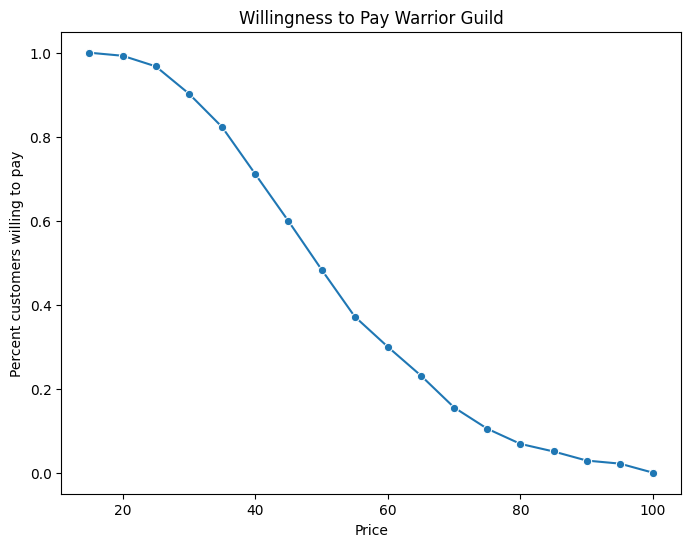

In [ ]:
import seaborn as sns
# Plot customers willing to pay
plt.figure(figsize=(8, 6))
sns.lineplot(x='price', y='per_customers_wtp', data=cumulative_wtp, marker='o')
plt.xlabel('Price')
plt.ylabel('Percent customers willing to pay')
plt.title('Willingness to Pay Warrior Guild')
plt.show()

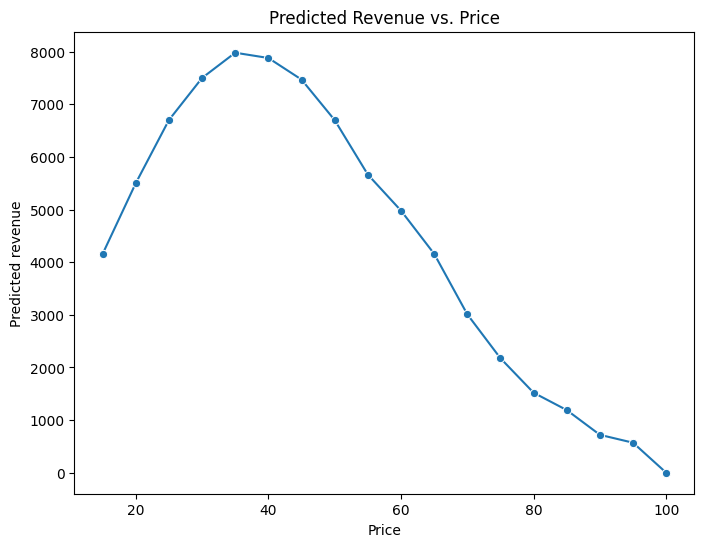

In [ ]:
# Plot revenue
plt.figure(figsize=(8, 6))
sns.lineplot(x='price', y='pred_revenue', data=cumulative_wtp, marker='o')
plt.xlabel('Price')
plt.ylabel('Predicted revenue')
plt.title('Predicted Revenue vs. Price')
plt.show()

In [ ]:
# Let's reload the data from 'price.csv' and recalculate the predicted revenue.

# Redefining the dataframe
cumulative_wtp = pd.DataFrame(columns=['game', 'price', 'per_customers_wtp', 'pred_revenue'])

# Total number of respondents (gamers) is 827
total_respondents = 827

for game in gg_price['gg.game.presented'].unique():
    game_data = gg_price[gg_price['gg.game.presented'] == game]
    for price in np.arange(min(game_data['gg.maxprice']), max(game_data['gg.maxprice']) + 5, 5):
        num_respondents_wtp = sum(game_data['gg.maxprice'] >= price)
        per_customers_wtp = num_respondents_wtp / total_respondents
        pred_revenue = per_customers_wtp * price * total_respondents
        cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
            'game': [game],
            'price': [price],
            'per_customers_wtp': [per_customers_wtp * 100],  # converting to percentage
            'pred_revenue': [pred_revenue]
        })], ignore_index=True)

# Calculate the maximum predicted revenue for each game
max_revenue = cumulative_wtp.groupby('game')['pred_revenue'].max().reset_index()

cumulative_wtp, max_revenue


(                game price  per_customers_wtp  pred_revenue
 0      Warrior Guild    18          33.131802        4932.0
 1      Warrior Guild    23          32.164450        6118.0
 2      Warrior Guild    28          30.955260        7168.0
 3      Warrior Guild    33          27.448609        7491.0
 4      Warrior Guild    38          22.007255        6916.0
 5      Warrior Guild    43          17.412334        6192.0
 6      Warrior Guild    48          13.422007        5328.0
 7      Warrior Guild    53           9.431681        4134.0
 8      Warrior Guild    58           6.771463        3248.0
 9      Warrior Guild    63           5.078597        2646.0
 10     Warrior Guild    68           3.264813        1836.0
 11     Warrior Guild    73           2.418380        1460.0
 12     Warrior Guild    78           1.209190         780.0
 13     Warrior Guild    83           1.088271         747.0
 14     Warrior Guild    88           0.483676         352.0
 15     Warrior Guild   

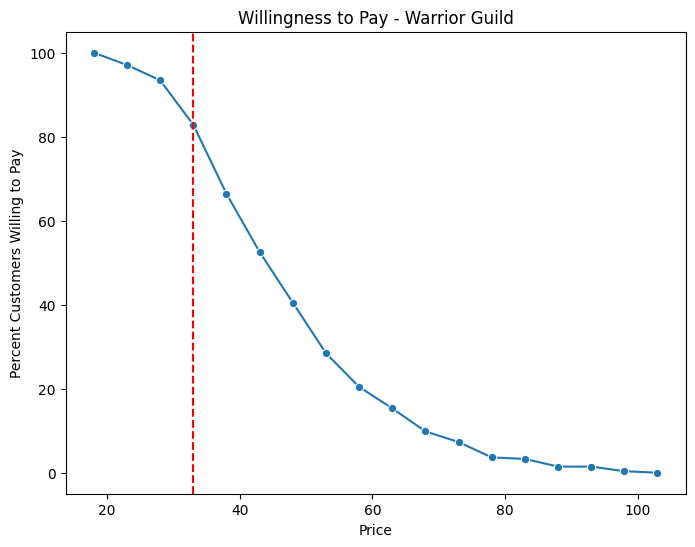

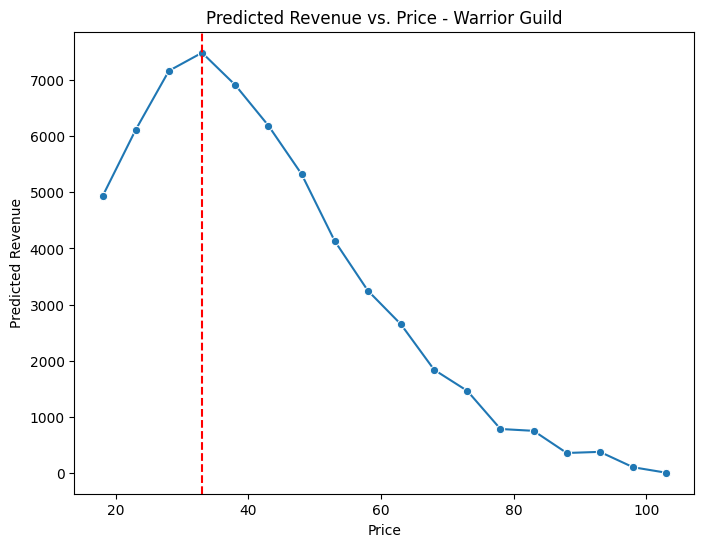

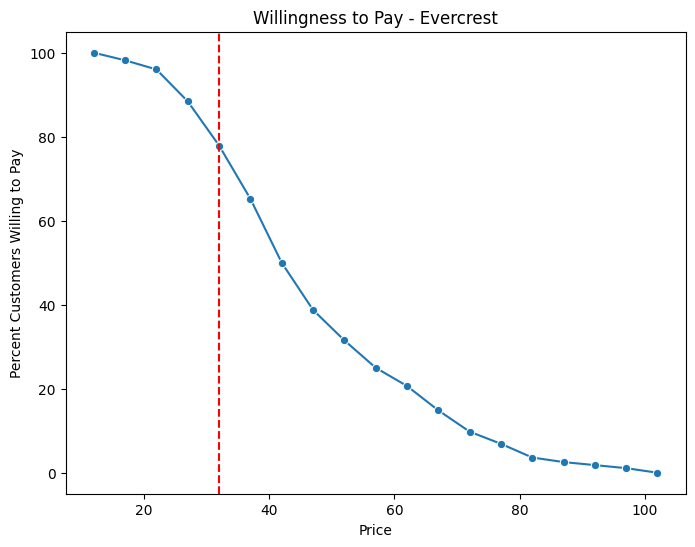

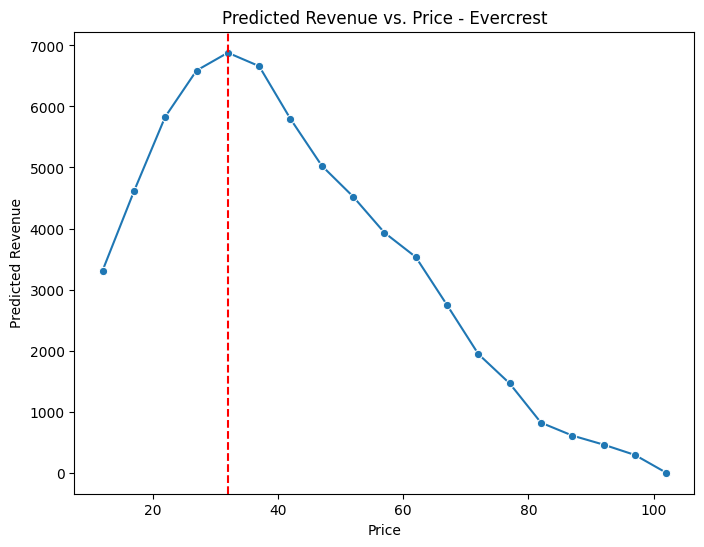

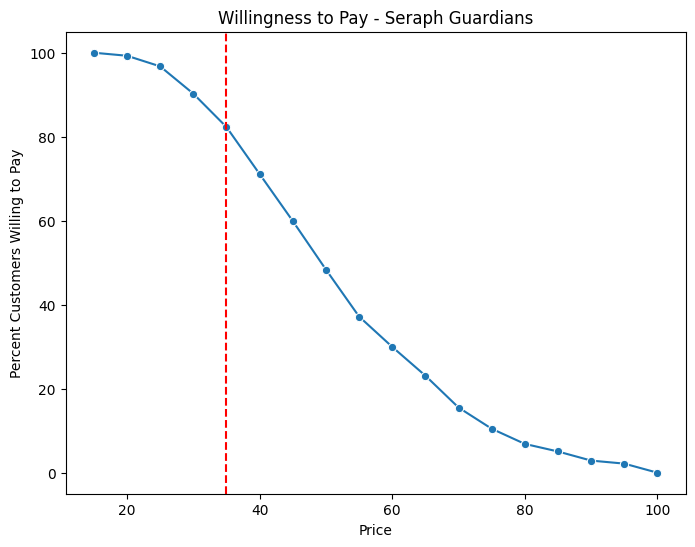

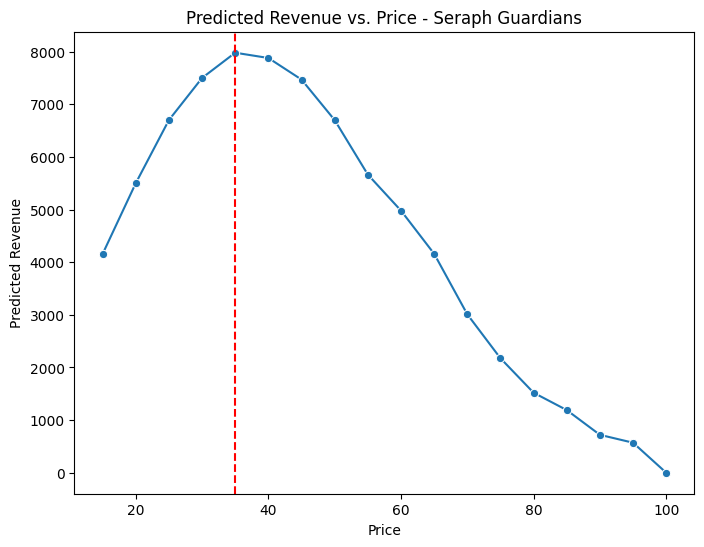

In [ ]:
# Function to calculate wtp and revenue with type conversion
def calculate_wtp_and_revenue(df):
    cumulative_wtp = pd.DataFrame(columns=['price', 'per_customers_wtp', 'pred_revenue'])
    total_respondents = len(df)
    for price in np.arange(min(df['gg.maxprice']), max(df['gg.maxprice']) + 5, 5):
        num_respondents_wtp = sum(df['gg.maxprice'] >= price)
        cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
            'price': [price],
            'per_customers_wtp': [num_respondents_wtp / total_respondents * 100],
            'pred_revenue': [num_respondents_wtp * price]
        })], ignore_index=True)
    cumulative_wtp['price'] = cumulative_wtp['price'].astype(float)
    cumulative_wtp['pred_revenue'] = cumulative_wtp['pred_revenue'].astype(float)
    return cumulative_wtp

# Recalculating for each game with type conversion
w_cumulative_wtp = calculate_wtp_and_revenue(warrior_guild_df)
e_cumulative_wtp = calculate_wtp_and_revenue(evercrest_df)
s_cumulative_wtp = calculate_wtp_and_revenue(seraph_guardians_df)

# Redefining the plotting function
def plot_game_data(game_name, cumulative_wtp):
    plt.figure(figsize=(8, 6))
    sns.lineplot(x='price', y='per_customers_wtp', data=cumulative_wtp, marker='o')
    max_revenue_price = cumulative_wtp.loc[cumulative_wtp['pred_revenue'].idxmax(), 'price']
    plt.axvline(max_revenue_price, color='r', linestyle='--')
    plt.xlabel('Price')
    plt.ylabel('Percent Customers Willing to Pay')
    plt.title(f'Willingness to Pay - {game_name}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.lineplot(x='price', y='pred_revenue', data=cumulative_wtp, marker='o')
    plt.axvline(max_revenue_price, color='r', linestyle='--')
    plt.xlabel('Price')
    plt.ylabel('Predicted Revenue')
    plt.title(f'Predicted Revenue vs. Price - {game_name}')
    plt.show()

# Plotting for each game
plot_game_data('Warrior Guild', w_cumulative_wtp)
plot_game_data('Evercrest', e_cumulative_wtp)
plot_game_data('Seraph Guardians', s_cumulative_wtp)


In [ ]:
data5.columns

Index(['gender', 'state', 'age', 'income', 'imp.challenge', 'imp.unlocks',
       'imp.customize', 'imp.difficulty', 'imp.characters', 'imp.storyline',
       'imp.mastery', 'imp.backstory', 'imp.dominate', 'imp.completion',
       'imp.wealth', 'imp.fantasy', 'imp.items', 'imp.power', 'imp.offbeat',
       'imp.collect', 'enj.excitement', 'enj.destruction', 'enj.others',
       'enj.react', 'enj.duels', 'enj.strategy', 'enj.roleplay',
       'enj.competition', 'enj.decisions', 'enj.common.goal', 'enj.planning',
       'enj.immersion', 'enj.helping', 'enj.fast', 'enj.guns', 'enj.gore',
       'enj.blow.up', 'freq.explore', 'freq.experiment', 'freq.study',
       'freq.char.creation', 'freq.stats', 'freq.customize', 'freq.test.world',
       'gg.game.presented', 'gg.maxprice', 'rank.WarriorGuild',
       'rank.SeraphGuardians', 'rank.Evercrest', 'rank.DevilsGate',
       'rank.Marksman', 'rank.QuestoftheTitan', 'Fantasy&Immersion',
       'Non-competitive Gameplay', 'Strategic Play', 'A

In [ ]:
# Filter the relevant columns for analysis
relevant_data = data5[['gg.game.presented', 'gg.maxprice', 'Cluster_Cat']]

# Create dummy variables for the 'Segment_Label' since it's a categorical variable
segment_dummies = pd.get_dummies(relevant_data['Cluster_Cat'],drop_first=True)

# Concatenate the dummy variables with the max price and game presented
data_for_regression = pd.concat([relevant_data['gg.maxprice'], segment_dummies, relevant_data['gg.game.presented']], axis=1)

# Now let's perform separate OLS regressions for each game

games = data_for_regression['gg.game.presented'].unique()

print(games)
results = {}

for game in games:
    # Filter data for the current game
    game_data = data_for_regression[data_for_regression['gg.game.presented'] == game]

    # Prepare the independent variables (segment dummies) and the dependent variable (max price)
    X = game_data[segment_dummies.columns]
    y = game_data['gg.maxprice']

    # Add a constant to the model (the intercept)
    X = sm.add_constant(X)

    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    # Save the model summary
    results[game] = model.summary()

# Return the results for the first game to inspect the output
results[games[0]]

['Warrior Guild' 'Evercrest' 'Seraph Guardians']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gg.maxprice   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     10.90
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           3.25e-08
Time:                        22:26:06   Log-Likelihood:                -1166.6
No. Observations:                 277   AIC:                             2343.
Df Residuals:                     272   BIC:                             2361.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     57.9846      2.043     28.381      0.000      53.962      62.007
Dynamic Action Seekers   -10.2455      3.174     -3.228      0.001     -16.494      -3.997
Immersive Adventurers     -0.4154      2.889     -0.144      0.886      -6.104       5.273
Relaxed Enthusiasts      -13.1210      3.216     -4.080      0.000     -19.452      -6.790
Strategic Competitors    -15.0548      2.989     -5.037      0.000     -20.939      -9.170
==============================================================================
Omnibus:                       12.629   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.436
Skew:                           0.539   Prob(JB):                      0.00121
Kurtosis:                       3.020   Cond. No.                         5.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm

data5['Cluster_Cat'] = data5['Segment_Label'].astype('category')

# Prepare the data for regression
X = pd.get_dummies(data5['Cluster_Cat'], drop_first=True)  # One-Hot Encoding for categorical data
y = data5['gg.maxprice']

# Add a constant to the model
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# View the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            gg.maxprice   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     11.01
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           1.06e-08
Time:                        22:30:22   Log-Likelihood:                -3504.2
No. Observations:                 827   AIC:                             7018.
Df Residuals:                     822   BIC:                             7042.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     51

In [ ]:
data5[['gg.game.presented', 'gg.maxprice', 'Cluster_Cat']]

,gg.game.presented,gg.maxprice,Cluster_Cat
0,Warrior Guild,50,Immersive Adventurers
1,Warrior Guild,34,Relaxed Enthusiasts
2,Warrior Guild,42,Strategic Competitors
3,Warrior Guild,55,Strategic Competitors
4,Evercrest,49,Strategic Competitors
...,...,...,...
822,Seraph Guardians,38,Immersive Adventurers
823,Seraph Guardians,48,Community Engagers
824,Seraph Guardians,51,Relaxed Enthusiasts
825,Evercrest,42,Community Engagers


In [ ]:

# Let's summarize the most and least interested segments for each game based on the regression coefficients
interest_summary = {}

for game, summary in results.items():
    # Get the summary as a dataframe
    summary_df = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)[0]

    # Sort the segments based on the coefficient values while filtering out the non-significant ones
    significant_segments = summary_df[summary_df['P>|t|'] < 0.05].sort_values('coef', ascending=False)

    # The most interested segment will be the one with the highest positive significant coefficient
    most_interested = significant_segments.index[0] if not significant_segments.empty else None

    # The least interested segment will be the one with the lowest positive significant coefficient
    # or the highest negative significant coefficient
    least_interested = significant_segments.index[-1] if not significant_segments.empty else None

    # Save the results
    interest_summary[game] = {
        'Most Interested': most_interested,
        'Least Interested': least_interested,
        'All Interests': significant_segments['coef'].to_dict()
    }

interest_summary

{'Warrior Guild': {'Most Interested': 'const',
  'Least Interested': 'const',
  'All Interests': {'const': 46.9464}},
 'Evercrest': {'Most Interested': 'const',
  'Least Interested': 'Strategic Competitors',
  'All Interests': {'const': 49.0, 'Strategic Competitors': -8.4921}},
 'Seraph Guardians': {'Most Interested': 'const',
  'Least Interested': 'Strategic Competitors',
  'All Interests': {'const': 57.9846,
   'Dynamic Action Seekers': -10.2455,
   'Relaxed Enthusiasts': -13.121,
   'Strategic Competitors': -15.0548}}}

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
# Linear regression analysis to determine segment interest in each game
linear_reg_results = {}

# One-hot encoding the 'Cluster_Cat' column
one_hot_encoder = OneHotEncoder()
encoded_segments = one_hot_encoder.fit_transform(relevant_data[['Cluster_Cat']]).toarray()
segment_names = one_hot_encoder.get_feature_names_out(['Cluster_Cat'])

# Performing linear regression for each game
for game in relevant_data['gg.game.presented'].unique():
    game_filter = relevant_data['gg.game.presented'] == game
    X_game = encoded_segments[game_filter]
    y_game = relevant_data.loc[game_filter, 'gg.maxprice']

    # Linear regression model
    linear_reg = LinearRegression()
    linear_reg.fit(X_game, y_game)

    # Coefficients for each segment
    segment_coefficients = linear_reg.coef_

    # Mapping coefficients to segment names
    segment_interest = dict(zip(segment_names, segment_coefficients))

    # Identifying most and least interested segments
    most_interested_segment = max(segment_interest, key=segment_interest.get)
    least_interested_segment = min(segment_interest, key=segment_interest.get)

    # Storing results
    linear_reg_results[game] = {
        'most_interested': most_interested_segment,
        'least_interested': least_interested_segment,
        'all_segments_interest': segment_interest
    }

linear_reg_results



{'Warrior Guild': {'most_interested': 'Cluster_Cat_Immersive Adventurers',
  'least_interested': 'Cluster_Cat_Relaxed Enthusiasts',
  'all_segments_interest': {'Cluster_Cat_Community Engagers': -633884368830489.0,
   'Cluster_Cat_Dynamic Action Seekers': -633884368830488.0,
   'Cluster_Cat_Immersive Adventurers': -633884368830487.4,
   'Cluster_Cat_Relaxed Enthusiasts': -633884368830493.6,
   'Cluster_Cat_Strategic Competitors': -633884368830490.2}},
 'Evercrest': {'most_interested': 'Cluster_Cat_Immersive Adventurers',
  'least_interested': 'Cluster_Cat_Strategic Competitors',
  'all_segments_interest': {'Cluster_Cat_Community Engagers': -222315319297108.1,
   'Cluster_Cat_Dynamic Action Seekers': -222315319297112.25,
   'Cluster_Cat_Immersive Adventurers': -222315319297107.56,
   'Cluster_Cat_Relaxed Enthusiasts': -222315319297112.66,
   'Cluster_Cat_Strategic Competitors': -222315319297116.47}},
 'Seraph Guardians': {'most_interested': 'Cluster_Cat_Community Engagers',
  'least_inte

In [ ]:
for game in data5['gg.game.presented'].unique():
        print(f"OLS Regression for {game}:")

        # Filter data for the current game
        game_data = data5[data5['gg.game.presented'] == game]

        # Preparing the data for OLS regression
        X = pd.get_dummies(game_data['Cluster_Cat'])
        y = game_data['gg.maxprice']

        # Adding a constant to the model (OLS assumption)
        X = sm.add_constant(X)

        # Fit OLS model
        model = sm.OLS(y, X).fit()

        # Print the summary of the regression
        print(model.summary(), "\n")

OLS Regression for Warrior Guild:
                            OLS Regression Results                            
Dep. Variable:            gg.maxprice   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.569
Date:                Sat, 16 Dec 2023   Prob (F-statistic):              0.183
Time:                        22:43:37   Log-Likelihood:                -1136.2
No. Observations:                 274   AIC:                             2282.
Df Residuals:                     269   BIC:                             2301.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [ ]:
# Counting the number of times each of Athena's games is ranked as the most preferred choice (rank 1)
ranking_data = data5.iloc[:,46:52]
athena_games_new = ['rank.WarriorGuild',  'rank.Evercrest', 'rank.SeraphGuardians']
market_share_new = {game: (ranking_data[game] == 1).sum() for game in ranking_data}
print(market_share_new)
# Total number of respondents in the new dataset
total_respondents_new = len(ranking_data)

# Calculating the percentage market share for each of Athena's games in the new dataset
market_share_percentage_new = {game: (count / total_respondents_new) * 100 for game, count in market_share_new.items()}
market_share_percentage_new

{'rank.WarriorGuild': 99, 'rank.SeraphGuardians': 445, 'rank.Evercrest': 84, 'rank.DevilsGate': 134, 'rank.Marksman': 12, 'rank.QuestoftheTitan': 53}


{'rank.WarriorGuild': 11.970979443772672,
 'rank.SeraphGuardians': 53.80894800483675,
 'rank.Evercrest': 10.157194679564691,
 'rank.DevilsGate': 16.203143893591292,
 'rank.Marksman': 1.4510278113663846,
 'rank.QuestoftheTitan': 6.408706166868199}

In [ ]:
# Example of modifying the simulation with weighted ranks
# Assigning weights to each rank (for simplicity, these are arbitrary)
rank_weights = {1: 0.5, 2: 0.3, 3: 0.1, 4: 0.05, 5: 0.03, 6: 0.02}

# Calculating weighted market share
weighted_market_share = {}
for game in market_share_new:
    weighted_count = sum(rank_weights[rank] for rank in ranking_data[game])
    weighted_market_share[game] = (weighted_count / total_respondents_new) * 100

weighted_market_share


{'rank.WarriorGuild': 15.301088270858425,
 'rank.SeraphGuardians': 34.15840386940764,
 'rank.Evercrest': 12.723095525997477,
 'rank.DevilsGate': 15.783555018137779,
 'rank.Marksman': 7.160822249093155,
 'rank.QuestoftheTitan': 14.873035066505336}

In [ ]:
import numpy as np

# Game information
games_info = {
    'Warrior Guild': {'ideal_price': 33, 'wtp_percentage': 82.85, 'predicted_revenue': 7491},
    'Evercrest': {'ideal_price': 32, 'wtp_percentage': 77.90, 'predicted_revenue': 6880},
    'Seraph Guardians': {'ideal_price': 35, 'wtp_percentage': 82.31, 'predicted_revenue': 7980}
}

# Total market size
market_size = 827  # Number of respondents

# Simulate market share
market_share = {game: 0 for game in games_info}

for _ in range(market_size):
    for game, info in games_info.items():
        # Simulating willingness to pay
        if np.random.rand() < info['wtp_percentage'] / 100:
            # If willing to pay, consider the game ranking preference
            # This part needs ranking data and additional logic
            # For simplicity, assuming equal preference here
            market_share[game] += 1

# Calculating market share percentage
market_share_percentage = {game: (count / market_size) * 100 for game, count in market_share.items()}

market_share_percentage


{'Warrior Guild': 82.22490931076179,
 'Evercrest': 78.35550181378477,
 'Seraph Guardians': 84.76420798065296}

In [ ]:
# Adjusting the simulation to include competitor games with modified probabilities
rankings = data5.iloc[:,46:52]
# Adjusted probabilities for each rank
adjusted_rank_probabilities = {1: 0.3, 2: 0.21, 3: 0.15, 4: 0.09, 5: 0.06, 6: 0.03}

# Competitor games
competitor_games = ['DevilsGate', 'Marksman', 'QuestoftheTitan']
all_games = list(games_info.keys()) + competitor_games

# Initialize market share count for Athena's and competitor games
total_market_share = {game: 0 for game in all_games}

# Simulating weighted market share including competitor games
for idx, row in rankings.iterrows():
    for game in all_games:
        # Check if the game is Athena's game or a competitor's game
        if game in games_info:
            wtp_percentage = games_info[game]['wtp_percentage'] / 100
        else:
            wtp_percentage = 0.8  # Example default WTP for competitor games

        # Rank of the game for the respondent
        game_rank_key = f'rank.{game.replace(" ", "")}'
        game_rank = row[game_rank_key]

        # Probability of purchase based on the rank and willingness to pay
        purchase_probability = adjusted_rank_probabilities[game_rank] * wtp_percentage

        # Simulating the purchase decision
        if np.random.rand() < purchase_probability:
            total_market_share[game] += 1

# Calculating weighted market share percentage for all games
weighted_total_market_share_percentage = {game: (count / market_size) * 100 for game, count in total_market_share.items()}

weighted_total_market_share_percentage


{'Warrior Guild': 11.24546553808948,
 'Evercrest': 9.915356711003627,
 'Seraph Guardians': 20.314389359129382,
 'DevilsGate': 9.915356711003627,
 'Marksman': 6.045949214026603,
 'QuestoftheTitan': 11.124546553808948}